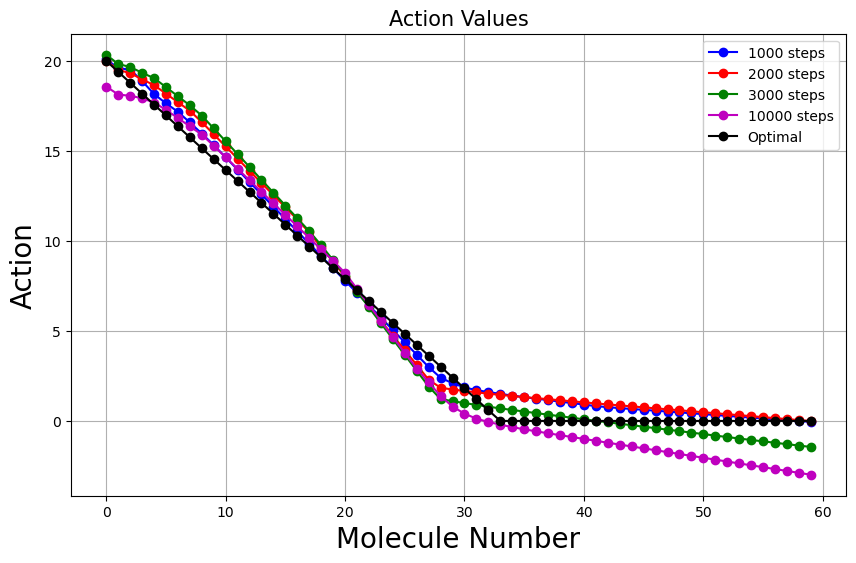

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch import nn
from torch.optim import Adam
from collections import deque
import time
import random

from gymnasium import spaces
import molcontrol

## Parameters
steps = 1000
target = 20
molecule_lifetime = 1.0
dt = 0.5
history_length = 1
observable_indices = np.array([0])
upper_mol = target*3

##Seed
RUN_SEED = 2

##For neural nets
batch_size = 200
model = molcontrol.NeuralNetwork([1, 64, 64, 1])
learning_rate = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
replay_memory = molcontrol.ReplayMemory(capacity=2000)

##Running the environment and learning
molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
action_val1 = molcontrol.control_plot_1d(model, upper_mol, molecule_lifetime, dt)

molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
action_val2 = molcontrol.control_plot_1d(model, upper_mol, molecule_lifetime, dt)

molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
action_val3 = molcontrol.control_plot_1d(model, upper_mol, molecule_lifetime, dt)

molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, 7000, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
action_val4 = molcontrol.control_plot_1d(model, upper_mol, molecule_lifetime, dt)

action_vals_th = molcontrol.control_plot_1dopt(upper_mol, target, molecule_lifetime, dt)

plt.figure(figsize=(10, 6))
plt.plot(action_val1, marker='o', linestyle='-', color='b', label = '1000 steps')
plt.plot(action_val2, marker='o', linestyle='-', color='r', label = '2000 steps')
plt.plot(action_val3, marker='o', linestyle='-', color='g', label = '3000 steps')
plt.plot(action_val4, marker='o', linestyle='-', color='m', label = '10000 steps')

plt.plot(action_vals_th, marker='o', linestyle='-', color='k', label = 'Optimal')
plt.legend(loc = 'best')
plt.title("Action Values", fontsize = 15)
plt.xlabel("Molecule Number", fontsize = 20)
plt.ylabel("Action", fontsize = 20)
plt.savefig("Neural_Nets_Get_Worse.png")
plt.grid(True)
plt.show()
